DỰ ÁN CUỐI KỲ - HỌC MÁY - NHÓM 19 - GV: LÊ ANH CƯỜNG

HỌ TÊN: 
- Nguyễn Minh Đăng Khoa - MSSV: 51800882
- Trần Ngọc Dũng - MSSV: 51800187

# TÊN DỮ LIỆU: Electric Production Data Set

LINK DỮ LIỆU: https://www.kaggle.com/kandij/electric-production

Mô tả: Dataset chỉ có 2 col, một cột là ngày tháng và cột còn lại liên quan đến phần trăm tiêu thụ. 

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt

import seaborn as sns
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from keras.callbacks import EarlyStopping

# Read Data

In [2]:
file_path = "./Electric_Production.csv"

In [3]:
# Chuyển đổi sang dạng yyyy/MM/dd và để DATE làm index
df = pd.read_csv(file_path, index_col="DATE", parse_dates=True)
print(df.shape)
df.tail()

(397, 1)


,Value
DATE,
2017-09-01,98.6154
2017-10-01,93.6137
2017-11-01,97.3359
2017-12-01,114.7212
2018-01-01,129.4048


In [4]:
# kiểm tra có dòng nào null không?
print(df.isnull().sum())

Value    0
dtype: int64


<AxesSubplot:xlabel='DATE', ylabel='Value'>

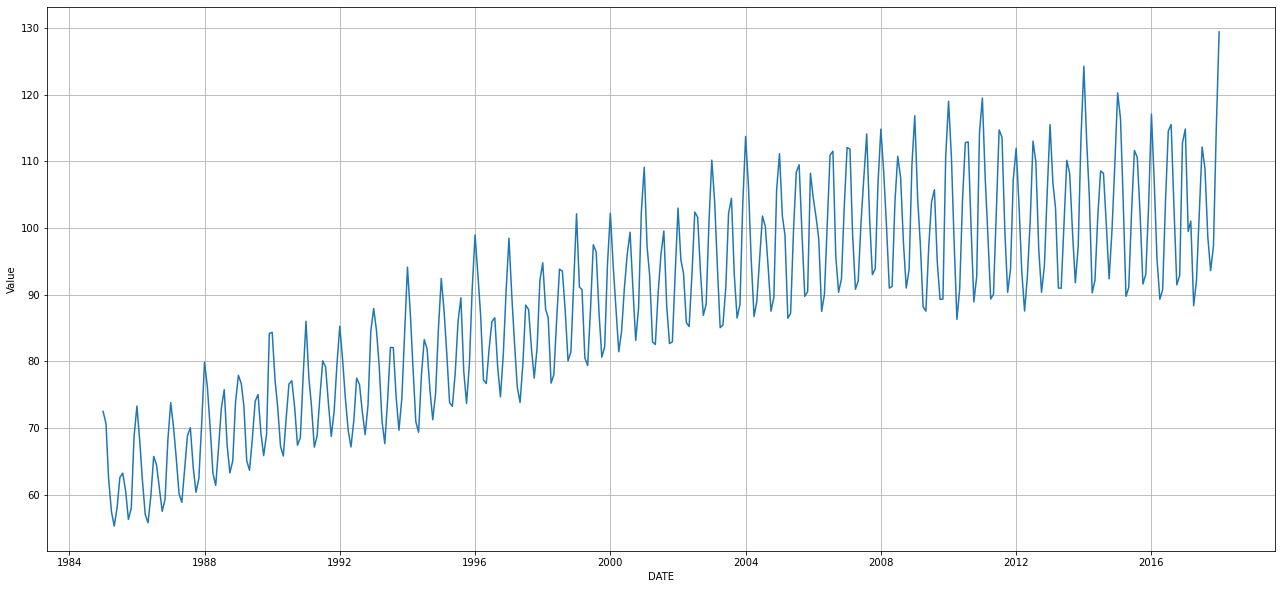

In [6]:
# Vẽ thể hiện Value qua từng tháng từ năm 1984 -> 2018
plt.figure(figsize=(22,10))
plt.grid()
sns.lineplot(x=df.index, y='Value', data=df)

# Preprocessing

In [7]:
# Chuyển đổi Value thành mảng numpy
dataset = df.values

In [8]:
# Đổi sang dạng float
dataset = dataset.astype("float32")

In [9]:
# Chuẩn hóa dataset
scaler = MinMaxScaler()
dataset = scaler.fit_transform(dataset)

In [10]:
# không thể sử dụng cách ngẫu nhiên để tách tập dữ liệu thành huấn luyện và kiểm tra 
# vì chuỗi sự kiện rất quan trọng đối với chuỗi thời gian
# Tách 80% dataset làm train và 20% còn lại làm test
train_size = int(len(dataset) * 0.8)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [11]:
# print(train)

In [12]:
# chuyển đổi mảng giá trị thành một ma trận tập dữ liệu 
# trong đó X là số lượng % điện tiêu thụ tại một thời điểm nhất định (t, t-1, t-2,...)
# Y là số lượng % điện tiêu thụ tại thời thời điểm tiếp theo (t + 1)
def create_dataset(dataset, seq_size=1):
    dataX, dataY = [], []
    
    for i in range(len(dataset) - seq_size - 1):
        window = dataset[i:(i + seq_size), 0]
        dataX.append(window)
        dataY.append(dataset[i + seq_size, 0])
    return np.array(dataX), np.array(dataY)

In [13]:
seq_size = 3 # Số timesteps
X_train, y_train = create_dataset(train, seq_size)
X_test, y_test = create_dataset(test, seq_size)

In [14]:
# print(train)

In [15]:
# print(X_train)

In [16]:
# print(y_train)

# Feed Forward Neural Networks

# MODEL 1

In [17]:
model_FFNN_1 = Sequential()
model_FFNN_1.add(Dense(64, input_dim=seq_size, activation="sigmoid"))
model_FFNN_1.add(Dense(1)) # kết quả đầu ra chỉ có 1 là Y (giá trị tiếp theo)
model_FFNN_1.compile(loss="mean_squared_error", optimizer="adam")
model_FFNN_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                256       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 321
Trainable params: 321
Non-trainable params: 0
_________________________________________________________________


In [18]:
earlyStopping = EarlyStopping(monitor='loss', patience=3)

In [44]:
EPOCHS = 100
BATCH_SIZE = 64

history_FFNN_1 = model_FFNN_1.fit(X_train, y_train,
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE,
                            callbacks=[earlyStopping],
                            validation_data=(X_test, y_test),
                            verbose=2)

Epoch 1/100
5/5 - 0s - loss: 0.0089 - val_loss: 0.0150
Epoch 2/100
5/5 - 0s - loss: 0.0088 - val_loss: 0.0144
Epoch 3/100
5/5 - 0s - loss: 0.0088 - val_loss: 0.0143
Epoch 4/100
5/5 - 0s - loss: 0.0088 - val_loss: 0.0147
Epoch 5/100
5/5 - 0s - loss: 0.0088 - val_loss: 0.0148
Epoch 6/100
5/5 - 0s - loss: 0.0087 - val_loss: 0.0144
Epoch 7/100
5/5 - 0s - loss: 0.0088 - val_loss: 0.0142
Epoch 8/100
5/5 - 0s - loss: 0.0087 - val_loss: 0.0148
Epoch 9/100
5/5 - 0s - loss: 0.0087 - val_loss: 0.0149
Epoch 10/100
5/5 - 0s - loss: 0.0087 - val_loss: 0.0142
Epoch 11/100
5/5 - 0s - loss: 0.0087 - val_loss: 0.0143
Epoch 12/100
5/5 - 0s - loss: 0.0087 - val_loss: 0.0146
Epoch 13/100
5/5 - 0s - loss: 0.0087 - val_loss: 0.0144
Epoch 14/100
5/5 - 0s - loss: 0.0086 - val_loss: 0.0141
Epoch 15/100
5/5 - 0s - loss: 0.0086 - val_loss: 0.0143
Epoch 16/100
5/5 - 0s - loss: 0.0086 - val_loss: 0.0146
Epoch 17/100
5/5 - 0s - loss: 0.0086 - val_loss: 0.0144
Epoch 18/100
5/5 - 0s - loss: 0.0086 - val_loss: 0.0142
E

# PLOT

In [45]:
def plotModelLoss(loss, val_loss, title):
    plt.figure(figsize=(22, 10))
    plt.plot(loss, label="loss")
    plt.plot(val_loss, label="val_loss")
    plt.grid()
    plt.legend()
    plt.title(title)

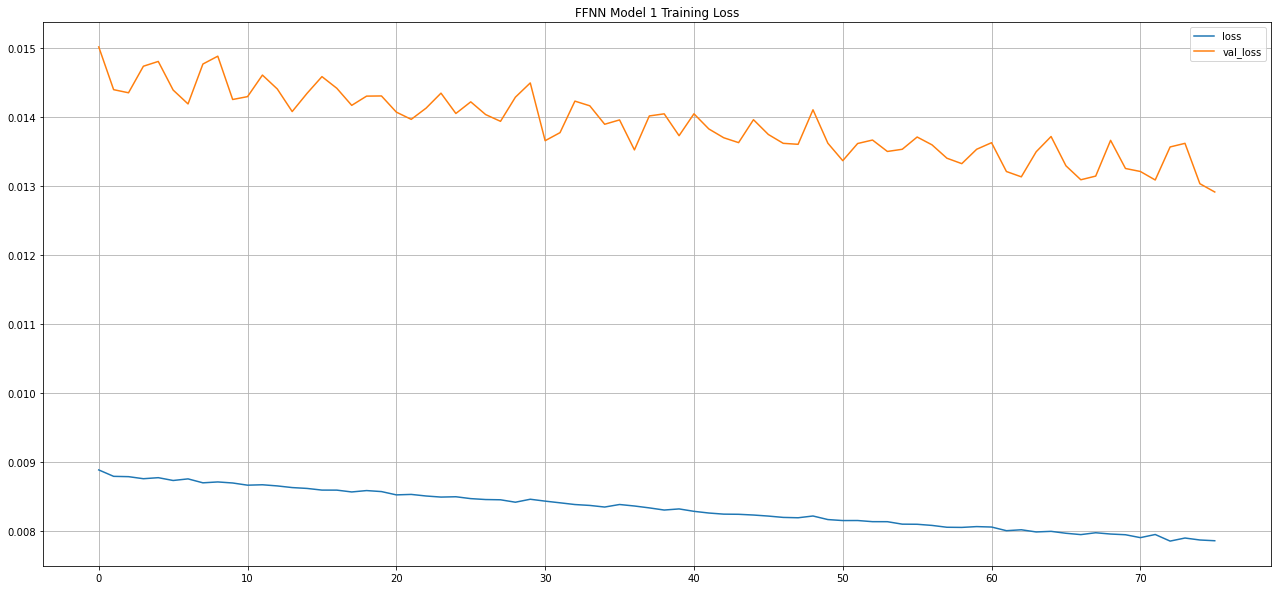

In [46]:
plotModelLoss(history_FFNN_1.history['loss'], history_FFNN_1.history['val_loss'], "FFNN Model 1 Training Loss")

# PREDICT

In [47]:
def predictionAndPlot(model, X_train, X_test, dfTrainPredict, dfTestPredict):
    # make predictions
    trainPredict = model.predict(X_train)
    testPredict = model.predict(X_test)
    
    # Trước đó đã dùng minmaxscaler nên giờ đảo ngược nó lại
    trainPredict = scaler.inverse_transform(trainPredict)
    testPredict = scaler.inverse_transform(testPredict)
    
    # Căn chỉnh lại để có thể so sánh dataset
    trainPredictPlot = np.empty_like(dataset)
    trainPredictPlot[:, :] = np.nan
    trainPredictPlot[seq_size:len(trainPredict) + seq_size, :] = trainPredict
    
    testPredictPlot = np.empty_like(dataset)
    testPredictPlot[:, :] = np.nan
    testPredictPlot[len(trainPredict)+(seq_size*2)+1:len(dataset)-1, :] = testPredict
    
    df[dfTrainPredict] = trainPredictPlot
    df[dfTestPredict] = testPredictPlot

    # Vẽ train, test so sánh với dataset
    plt.figure(figsize=(20,10))
    plt.plot(df.Value, label="data", alpha=0.7)
    plt.plot(df[dfTrainPredict], label="train")
    plt.plot(df[dfTestPredict], label="test")
    plt.ylabel("Value")
    plt.xlabel("Date")
    plt.legend()
    plt.grid()
    plt.show()

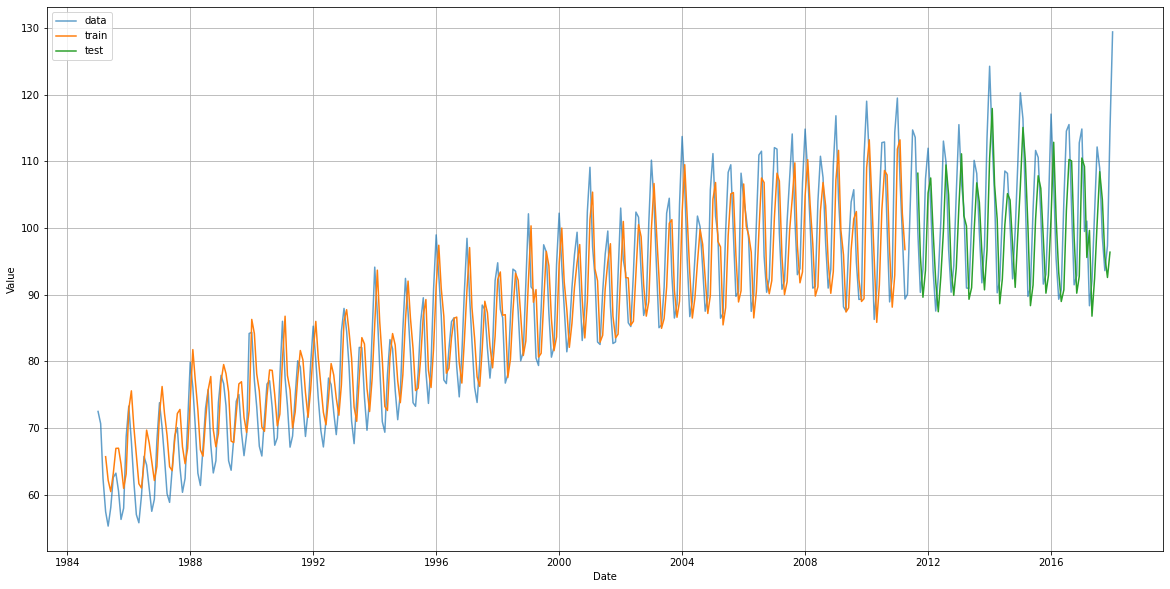

In [48]:
predictionAndPlot(model_FFNN_1, X_train, X_test, "trainPredict_FFNN_1", "testPredict_FFNN_1")

# MODEL 2

In [49]:
model_FFNN_2 = Sequential()
model_FFNN_2.add(Dense(64, input_dim=seq_size, activation="relu"))
model_FFNN_2.add(Dense(32, activation="relu"))
model_FFNN_2.add(Dense(1))
model_FFNN_2.compile(loss="mean_squared_error", optimizer="adam")
model_FFNN_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 64)                256       
_________________________________________________________________
dense_3 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 33        
Total params: 2,369
Trainable params: 2,369
Non-trainable params: 0
_________________________________________________________________


In [50]:
EPOCHS = 30
BATCH_SIZE = 32

history_FFNN_2 = model_FFNN_2.fit(X_train, y_train,
                            epochs=EPOCHS,
                            batch_size=BATCH_SIZE,
                            callbacks=[earlyStopping],
                            validation_data=(X_test, y_test),
                            verbose=2)

Epoch 1/30
10/10 - 1s - loss: 0.1129 - val_loss: 0.0905
Epoch 2/30
10/10 - 0s - loss: 0.0231 - val_loss: 0.0212
Epoch 3/30
10/10 - 0s - loss: 0.0187 - val_loss: 0.0218
Epoch 4/30
10/10 - 0s - loss: 0.0153 - val_loss: 0.0204
Epoch 5/30
10/10 - 0s - loss: 0.0131 - val_loss: 0.0233
Epoch 6/30
10/10 - 0s - loss: 0.0125 - val_loss: 0.0197
Epoch 7/30
10/10 - 0s - loss: 0.0116 - val_loss: 0.0178
Epoch 8/30
10/10 - 0s - loss: 0.0110 - val_loss: 0.0174
Epoch 9/30
10/10 - 0s - loss: 0.0103 - val_loss: 0.0166
Epoch 10/30
10/10 - 0s - loss: 0.0097 - val_loss: 0.0156
Epoch 11/30
10/10 - 0s - loss: 0.0092 - val_loss: 0.0146
Epoch 12/30
10/10 - 0s - loss: 0.0087 - val_loss: 0.0142
Epoch 13/30
10/10 - 0s - loss: 0.0082 - val_loss: 0.0133
Epoch 14/30
10/10 - 0s - loss: 0.0078 - val_loss: 0.0129
Epoch 15/30
10/10 - 0s - loss: 0.0075 - val_loss: 0.0119
Epoch 16/30
10/10 - 0s - loss: 0.0073 - val_loss: 0.0119
Epoch 17/30
10/10 - 0s - loss: 0.0068 - val_loss: 0.0109
Epoch 18/30
10/10 - 0s - loss: 0.0065 - 

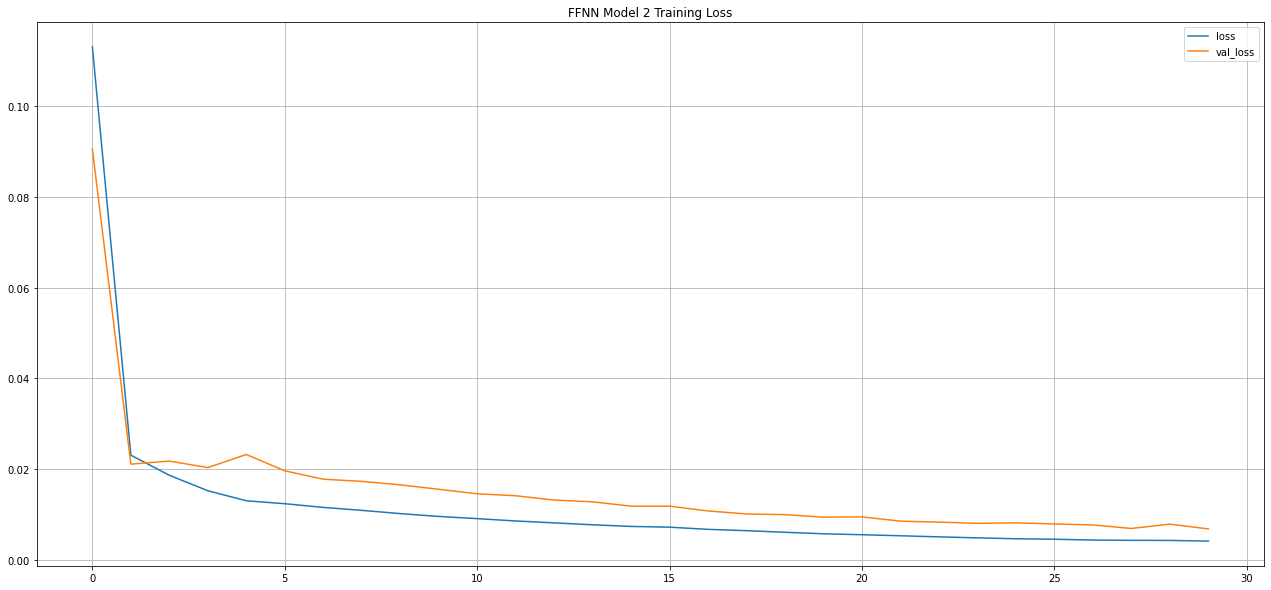

In [51]:
plotModelLoss(history_FFNN_2.history['loss'], history_FFNN_2.history['val_loss'], "FFNN Model 2 Training Loss")

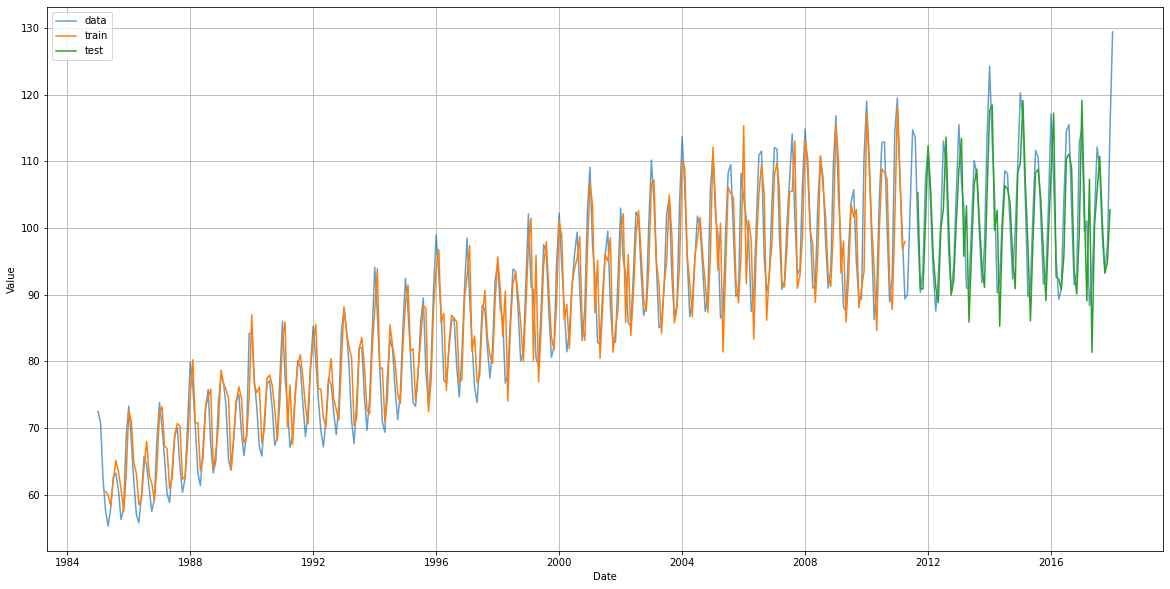

In [52]:
predictionAndPlot(model_FFNN_2, X_train, X_test, "trainPredict_FFNN_2", "testPredict_FFNN_2")

# LSTM

# Preprocessing

In [82]:
# reshape input to be [samples, time steps, features]
X_train_LSTM = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
X_test_LSTM = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))

In [83]:
print(X_train_LSTM.shape, X_test_LSTM.shape)

(313, 3, 1) (76, 3, 1)


# Model 1

In [84]:
# create and fit the LSTM network
model_LSTM_1 = Sequential()
model_LSTM_1.add(LSTM(64, input_shape=(seq_size, 1)))
model_LSTM_1.add(Dense(32))
model_LSTM_1.add(Dense(1))
model_LSTM_1.compile(loss='mean_squared_error', optimizer='adam')
model_LSTM_1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 64)                16896     
_________________________________________________________________
dense_11 (Dense)             (None, 32)                2080      
_________________________________________________________________
dense_12 (Dense)             (None, 1)                 33        
Total params: 19,009
Trainable params: 19,009
Non-trainable params: 0
_________________________________________________________________


In [91]:
EPOCHS = 30
BATCH_SIZE = 64


history_LSTM_1 = model_LSTM_1.fit(X_train_LSTM, y_train,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    validation_data=(X_test_LSTM, y_test),
                    callbacks=[earlyStopping],
                    verbose=2)


Epoch 1/30
5/5 - 0s - loss: 0.0106 - val_loss: 0.0180
Epoch 2/30
5/5 - 0s - loss: 0.0104 - val_loss: 0.0166
Epoch 3/30
5/5 - 0s - loss: 0.0102 - val_loss: 0.0156
Epoch 4/30
5/5 - 0s - loss: 0.0100 - val_loss: 0.0159
Epoch 5/30
5/5 - 0s - loss: 0.0099 - val_loss: 0.0168
Epoch 6/30
5/5 - 0s - loss: 0.0097 - val_loss: 0.0148
Epoch 7/30
5/5 - 0s - loss: 0.0095 - val_loss: 0.0154
Epoch 8/30
5/5 - 0s - loss: 0.0094 - val_loss: 0.0148
Epoch 9/30
5/5 - 0s - loss: 0.0092 - val_loss: 0.0148
Epoch 10/30
5/5 - 0s - loss: 0.0091 - val_loss: 0.0141
Epoch 11/30
5/5 - 0s - loss: 0.0090 - val_loss: 0.0144
Epoch 12/30
5/5 - 0s - loss: 0.0088 - val_loss: 0.0148
Epoch 13/30
5/5 - 0s - loss: 0.0087 - val_loss: 0.0140
Epoch 14/30
5/5 - 0s - loss: 0.0087 - val_loss: 0.0131
Epoch 15/30
5/5 - 0s - loss: 0.0083 - val_loss: 0.0146
Epoch 16/30
5/5 - 0s - loss: 0.0083 - val_loss: 0.0127
Epoch 17/30
5/5 - 0s - loss: 0.0081 - val_loss: 0.0128
Epoch 18/30
5/5 - 0s - loss: 0.0079 - val_loss: 0.0129
Epoch 19/30
5/5 - 0

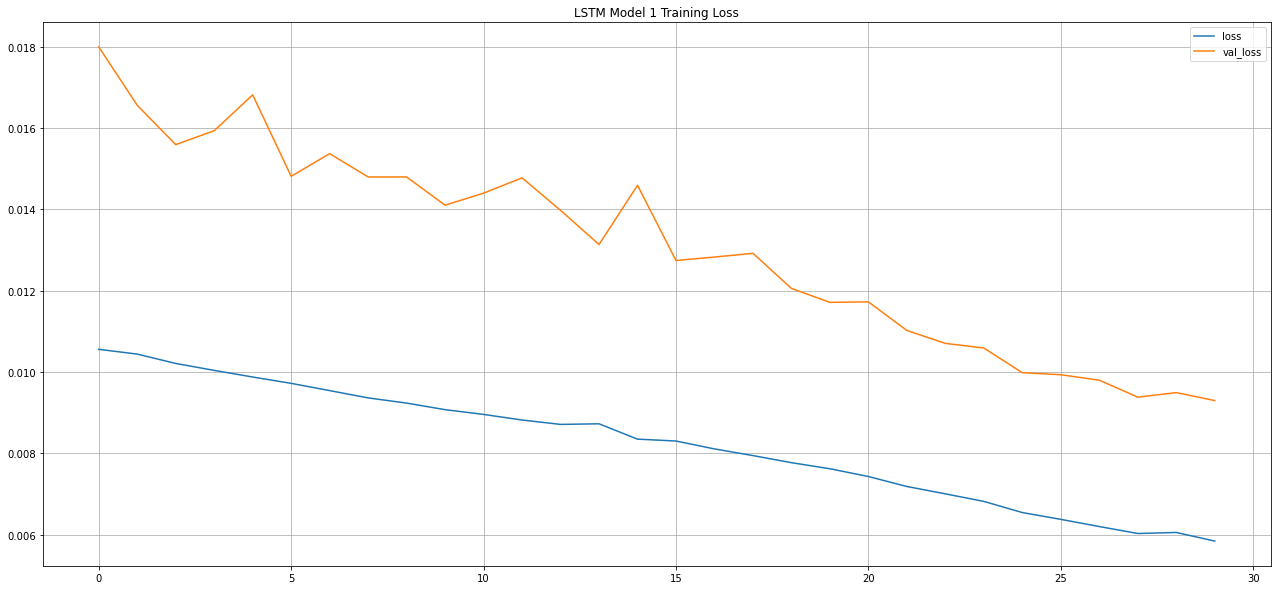

In [92]:
plotModelLoss(history_LSTM_1.history['loss'], history_LSTM_1.history['val_loss'], "LSTM Model 1 Training Loss")

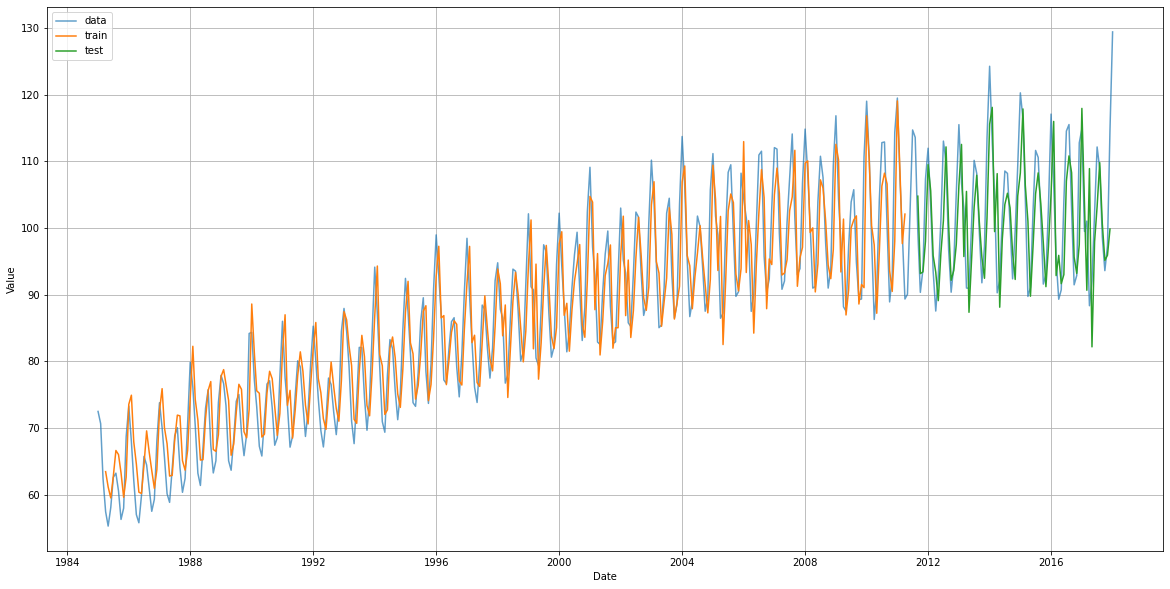

In [93]:
predictionAndPlot(model_LSTM_1, X_train_LSTM, X_test_LSTM, "trainPredict_LSTM_1", "testPredict_LSTM_1")

# MODEL 2

In [94]:
model_LSTM_2 = Sequential()
model_LSTM_2.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(seq_size, 1)))
model_LSTM_2.add(LSTM(50, activation='relu'))
model_LSTM_2.add(Dense(32))
model_LSTM_2.add(Dense(1))
model_LSTM_2.compile(loss='mean_squared_error', optimizer='adam')
model_LSTM_2.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_6 (LSTM)                (None, 3, 50)             10400     
_________________________________________________________________
lstm_7 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense_13 (Dense)             (None, 32)                1632      
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 33        
Total params: 32,265
Trainable params: 32,265
Non-trainable params: 0
_________________________________________________________________


In [98]:
EPOCHS1 = 100
BATCH_SIZE1 = 32

history_LSTM_2 = model_LSTM_2.fit(X_train_LSTM, y_train,
                    epochs=EPOCHS1,
                    batch_size=BATCH_SIZE1,
                    validation_data=(X_test_LSTM, y_test),
                    callbacks=[earlyStopping],
                    verbose=2
                   )

Epoch 1/100
10/10 - 0s - loss: 0.0089 - val_loss: 0.0143
Epoch 2/100
10/10 - 0s - loss: 0.0092 - val_loss: 0.0119
Epoch 3/100
10/10 - 0s - loss: 0.0086 - val_loss: 0.0143
Epoch 4/100
10/10 - 0s - loss: 0.0086 - val_loss: 0.0119
Epoch 5/100
10/10 - 0s - loss: 0.0085 - val_loss: 0.0156
Epoch 6/100
10/10 - 0s - loss: 0.0086 - val_loss: 0.0133
Epoch 7/100
10/10 - 0s - loss: 0.0085 - val_loss: 0.0120
Epoch 8/100
10/10 - 0s - loss: 0.0083 - val_loss: 0.0125
Epoch 9/100
10/10 - 0s - loss: 0.0085 - val_loss: 0.0124
Epoch 10/100
10/10 - 0s - loss: 0.0083 - val_loss: 0.0134
Epoch 11/100
10/10 - 0s - loss: 0.0082 - val_loss: 0.0124
Epoch 12/100
10/10 - 0s - loss: 0.0083 - val_loss: 0.0143
Epoch 13/100
10/10 - 0s - loss: 0.0083 - val_loss: 0.0145
Epoch 14/100
10/10 - 0s - loss: 0.0085 - val_loss: 0.0119


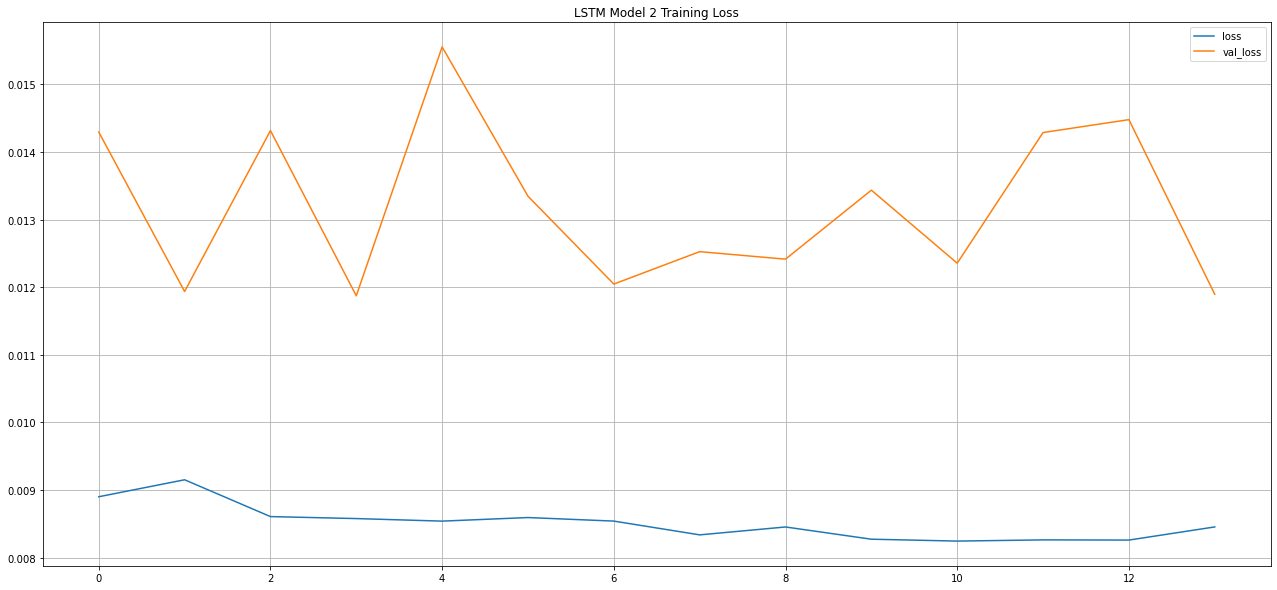

In [99]:
plotModelLoss(history_LSTM_2.history['loss'], history_LSTM_2.history['val_loss'], "LSTM Model 2 Training Loss")

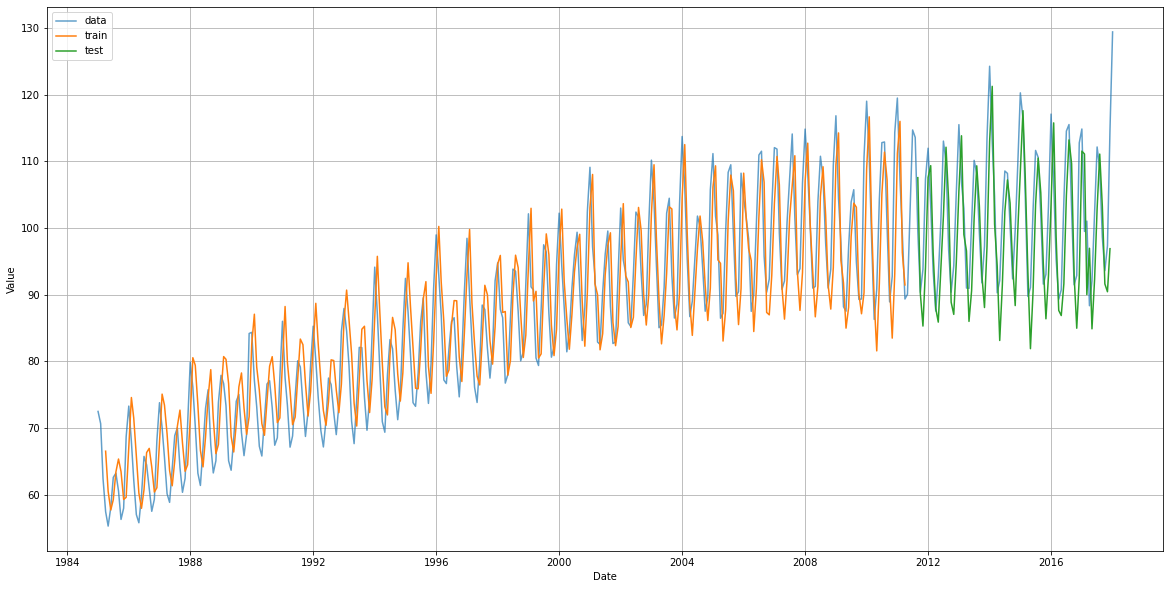

In [100]:
predictionAndPlot(model_LSTM_2, X_train_LSTM, X_test_LSTM, "trainPredict_LSTM_2", "testPredict_LSTM_2")